## Clase 10 - Análisis Exploratorio de Datos

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

**Profesor: Pablo Badilla**

Basados en la clases de Nicolás Caro.


## Objetivos de la Clase 

![Etapas de un Proyecto de Ciencia de Datos](./resources/etapas.png)

Como hemos visto anteriomente, los datos son la materia prima para la contrucción de análisis estadísticos y modelos predictivos. Esto implica que las hipótesis y predicciones  elaboradas por dichos modelos estarán directamente relacionados con la calidad de los datos. Por ende, es crítico asegurar un preprocesado y una buena examinación de los datasets a trabajar.

El contenido de esta cátedra, se centra en las técnicas esenciales para el preprocesado de datos usando las herramientas que hemos visto hasta el momento. 




## Análisis de datos exploratorio

El análisis exploratorio de los datos (Exploratory data analysis [EDA] en inglés) consiste en hacer investigaciones iniciales sobre los datos con el fin de descubrir los patrones, las distribuciones y anomalías de los datos, como también testear hipótesis y supuestos que tengamos sobre estos. Comunmente este análisis va de la mano de la estadística descriptiva y de las visualizaciones.



<center>
    
    <img src='./resources/eda_related.png' alt='Gráficos en análisis exploratorio de datos'/>

    Análisis exploratorio de datos. Fuente: https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15
</center>

<br>


Un concepto recurrente en el análisis exploratorio de datos consiste en el *perfilamiento* de datos. Este hace referencia a la sumarización por medio de estadística descriptiva. **En función de los perfiles generados, se puede tener una idea de la calidad del dataset** con lo cual es posible decidir como transformar las variables a disposición. 


En general, podemos resumir este proceso en estas 4 etapas: 


1. **Entender el problema**
2. **Análisis Univariado**: Estudiar la distribución de las variables y su relación con la variable dependiente.
3. **Análisis Bivariado y Multivariado**: Estudiar como se comporta una variable con respecto a otra.
4. **Análisis y Limpieza de los Datos Faltantes**




In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm

# Problema de Esta Clase: House Pricing



![House Pricing](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)

Fuente: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [2]:
# El conjunto a trabajar es el de entrenamiento
df = pd.read_csv("./resources/train.csv", index_col="Id")
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [4]:
qcut = pd.qcut(df["SalePrice"], 5, ["Low", "Low-Mid", "Mid", "Mid-High", "High"])

df["SalePriceQCut"] = qcut
df[["SalePrice", "SalePriceQCut"]] 

SalePrice SalePriceQCut
Id                           
1        208500      Mid-High
2        181500      Mid-High
3        223500      Mid-High
4        140000       Low-Mid
5        250000          High
...         ...           ...
1456     175000           Mid
1457     210000      Mid-High
1458     266500          High
1459     142125       Low-Mid
1460     147500           Mid

[1460 rows x 2 columns]

## Descripción de Algunas Columnas

`MSSubClass`: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

`MSZoning`: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
`LotFrontage`: Linear feet of street connected to property

`LotArea`: Lot size in square feet

`Street`: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
`Alley`: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
`LotShape`: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
`LandContour`: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
`Utilities`: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
`LotConfig`: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
`LandSlope`: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
...

La descripción completa la pueden encontrar aquí:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

## Perfilamiento Univariado

El punto inicial para comprender la naturaleza de una variable, pasa por caracterizar su distribución y la relación con la variable objetivo

In [5]:
object_type_set = [col for col in df.columns if df[col].dtype == "O"]
object_type_set

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

Se observa la estructura del dataset en tales columnas, en este caso se decide transformarlas a formato 'str' para obtener visualizaciones sobre sus valores. El proceso de transformar los tipos de datos en un dataframe se conoce como *typecasting*. 

In [6]:
# Se transoforman las columnas anteriores a 'str'
df = df.astype({col: "str" for col in object_type_set})

In [7]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   nan      Reg   
2           20       RL         80.0     9600   Pave   nan      Reg   
3           60       RL         68.0    11250   Pave   nan      IR1   
4           70       RL         60.0     9550   Pave   nan      IR1   
5           60       RL         84.0    14260   Pave   nan      IR1   

   LandContour Utilities LotConfig  ... PoolQC Fence MiscFeature MiscVal  \
Id                                  ...                                    
1          Lvl    AllPub    Inside  ...    nan   nan         nan       0   
2          Lvl    AllPub       FR2  ...    nan   nan         nan       0   
3          Lvl    AllPub    Inside  ...    nan   nan         nan       0   
4          Lvl    AllPub    Corner  ...    nan   nan         nan       0   
5          Lvl    AllPub       FR2  ...    nan   nan         nan       0   

   MoSold YrSold  SaleType  SaleCondition  SalePrice  SalePriceQCut  
Id                                                                   
1       2   2008        WD         Normal     208500       Mid-High  
2       5   2007        WD         Normal     181500       Mid-High  
3       9   2008        WD         Normal     223500       Mid-High  
4       2   2006        WD        Abnorml     140000        Low-Mid  
5      12   2008        WD         Normal     250000           High  

[5 rows x 81 columns]

In [8]:
names = ["numeric", "categorical"]

# Lista con las columnas numericas
numeric = [
    "LotFrontage",
    "LotArea",
    "YearBuilt",
    "YearRemodAdd",
    "MasVnrArea",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "GrLivArea",
    "GarageArea",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "MiscVal",
    "GarageYrBlt",
    "MSSubClass",
    "Fireplaces",
    "SalePrice",
]

# Lista con las columnas categoricas
categorical = list(set(df.columns) - set(numeric))
mapeo_categorical = {k: "category" for k in categorical}

mapeo_categorical

{'GarageType': 'category',
 'Functional': 'category',
 'PavedDrive': 'category',
 'Utilities': 'category',
 'KitchenQual': 'category',
 'SalePriceQCut': 'category',
 'BldgType': 'category',
 'MoSold': 'category',
 'LandContour': 'category',
 'HeatingQC': 'category',
 'SaleCondition': 'category',
 'Alley': 'category',
 'Foundation': 'category',
 'GarageCond': 'category',
 'GarageQual': 'category',
 'LotShape': 'category',
 'BsmtFinType2': 'category',
 'SaleType': 'category',
 'RoofMatl': 'category',
 'BsmtFinType1': 'category',
 'BsmtExposure': 'category',
 'PoolArea': 'category',
 'Condition1': 'category',
 'OverallQual': 'category',
 'FullBath': 'category',
 'Heating': 'category',
 'CentralAir': 'category',
 'ExterCond': 'category',
 'MasVnrType': 'category',
 'Neighborhood': 'category',
 'RoofStyle': 'category',
 'Exterior1st': 'category',
 'BsmtQual': 'category',
 'MSZoning': 'category',
 'LandSlope': 'category',
 'GarageCars': 'category',
 'Electrical': 'category',
 'KitchenAbvGr':

In [9]:
df = df.astype(mapeo_categorical)

### Análisis de la Variable Dependiente 

El paso inicial es saber como se distribuye la variable dependiente

In [10]:
df.shape

(1460, 81)

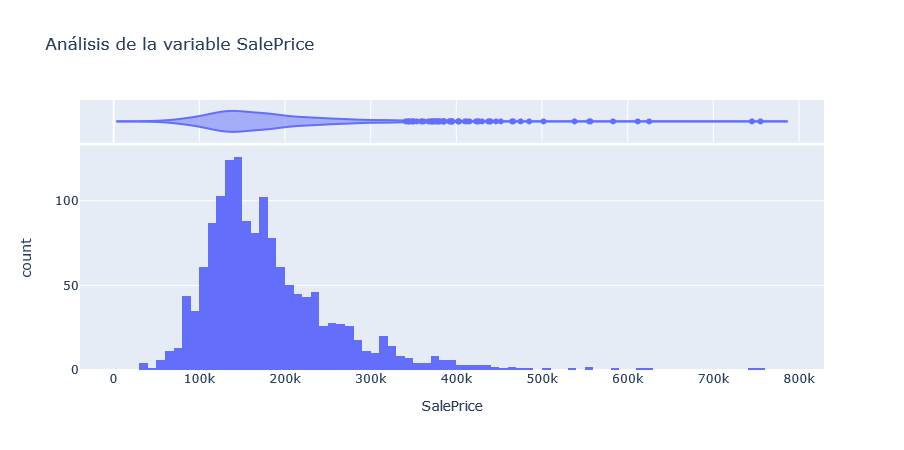

In [11]:
import plotly.express as px
px.histogram(df, x='SalePrice', title='Análisis de la variable SalePrice', marginal='violin')

In [12]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Algunas medidas de la distribución:

> **Skewness**: Las medidas de asimetría son indicadores que permiten establecer el grado de simetría (o asimetría) que presenta una distribución de probabilidad de una variable aleatoria sin tener que hacer su representación gráfica. 

![Skewness](./resources/skew.png)

> **Kurtosis**: Determina el grado de concentración que presentan los valores en la región central de la distribución.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT1n1f_pfBRWXsET7Zk8UbRnzKLDPqsBs5ESL_uh9aKmlDcIpkO)

In [13]:
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### Distribuciones de Variables Numéricas

A continuación, generaremos histogramas que nos permitirán entender y visualizar la geometría de cada distribución.

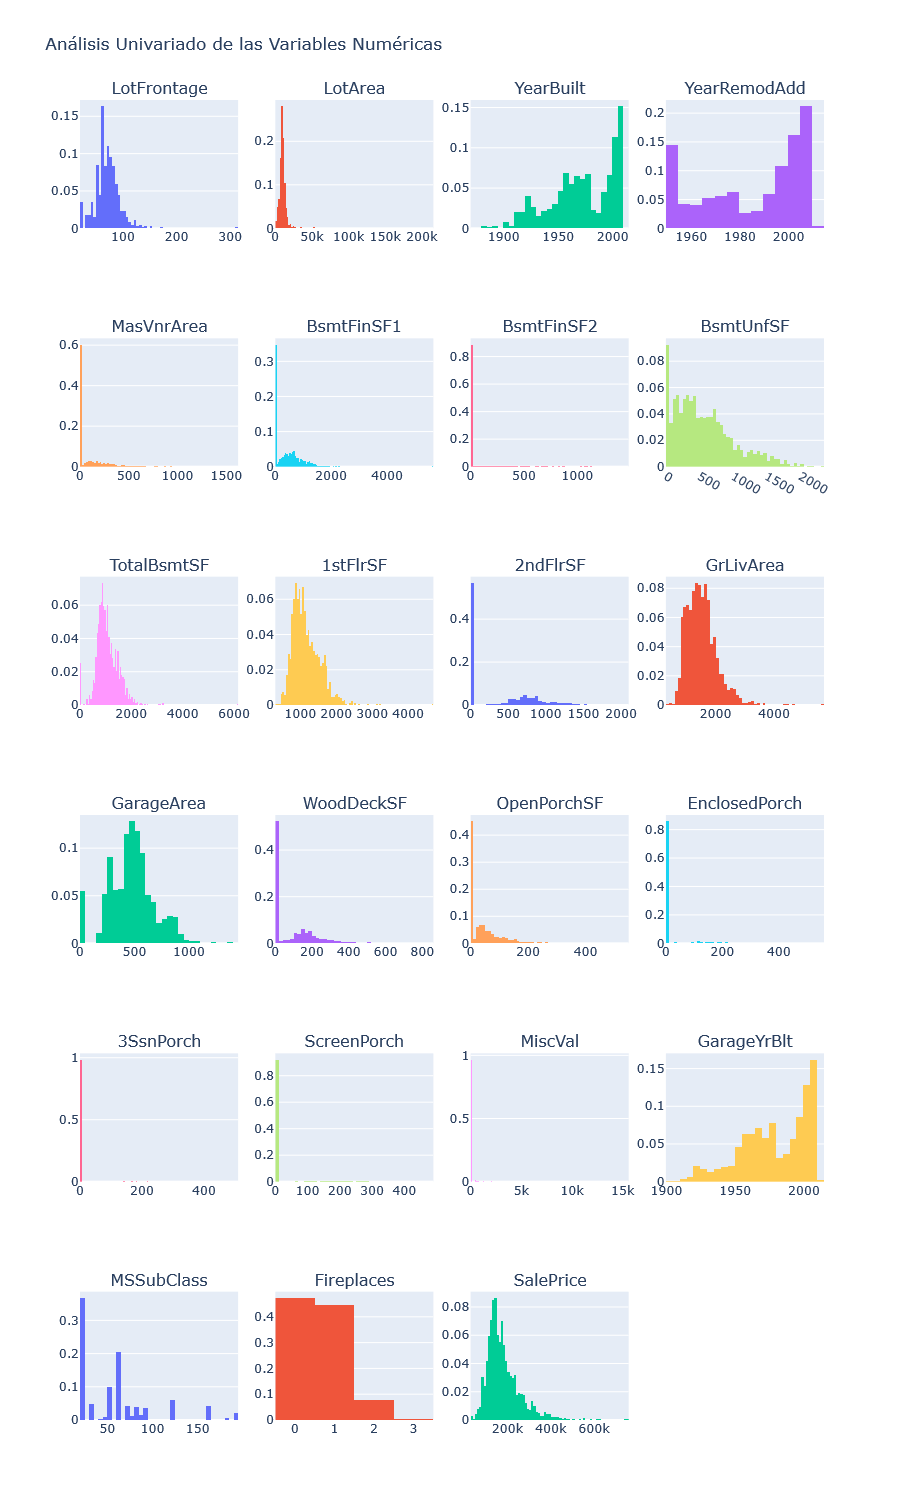

In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

n_cols = 4

fig = make_subplots(
    rows=len(numeric) // n_cols + 1, cols=n_cols, subplot_titles=numeric
)

for idx, col in enumerate(numeric):
    row_idx = idx // n_cols + 1
    col_idx = idx % n_cols + 1

    data = df.loc[:, col]
    hist = go.Histogram(x=data, name=col, histnorm="probability")
    fig.add_trace(hist, row=row_idx, col=col_idx)

fig.update_layout(
    height=1500,
    title_text="Análisis Univariado de las Variables Numéricas",
    showlegend=False,
)
fig.show()

> **Nota** sobre gráficos de Barra: 

¿Cuál es el problema de este gráfico?
    
![](./resources/grafico_charcha.jpg)

### Alternativa: Box Plot

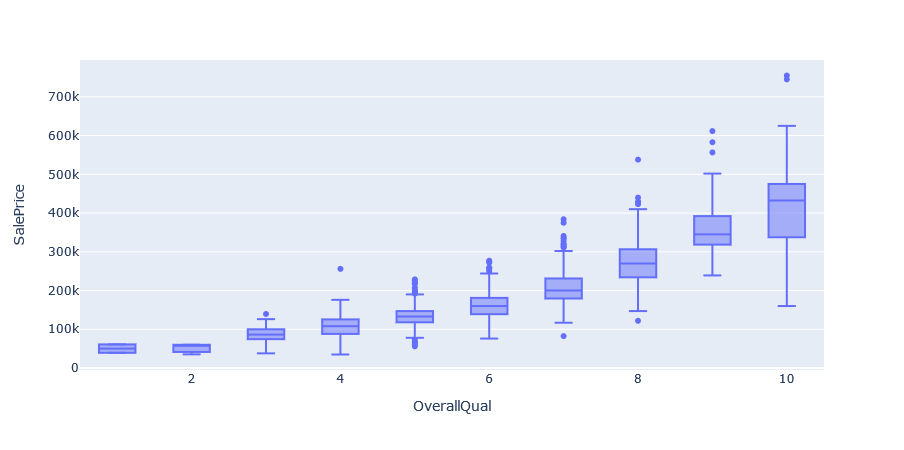

In [15]:
fig = px.box(df, x="OverallQual", y="SalePrice")
fig.show()

### Distribuciones de Variables Categóricas

Para las variables categóricas, se genera un conteo de valores únicos.

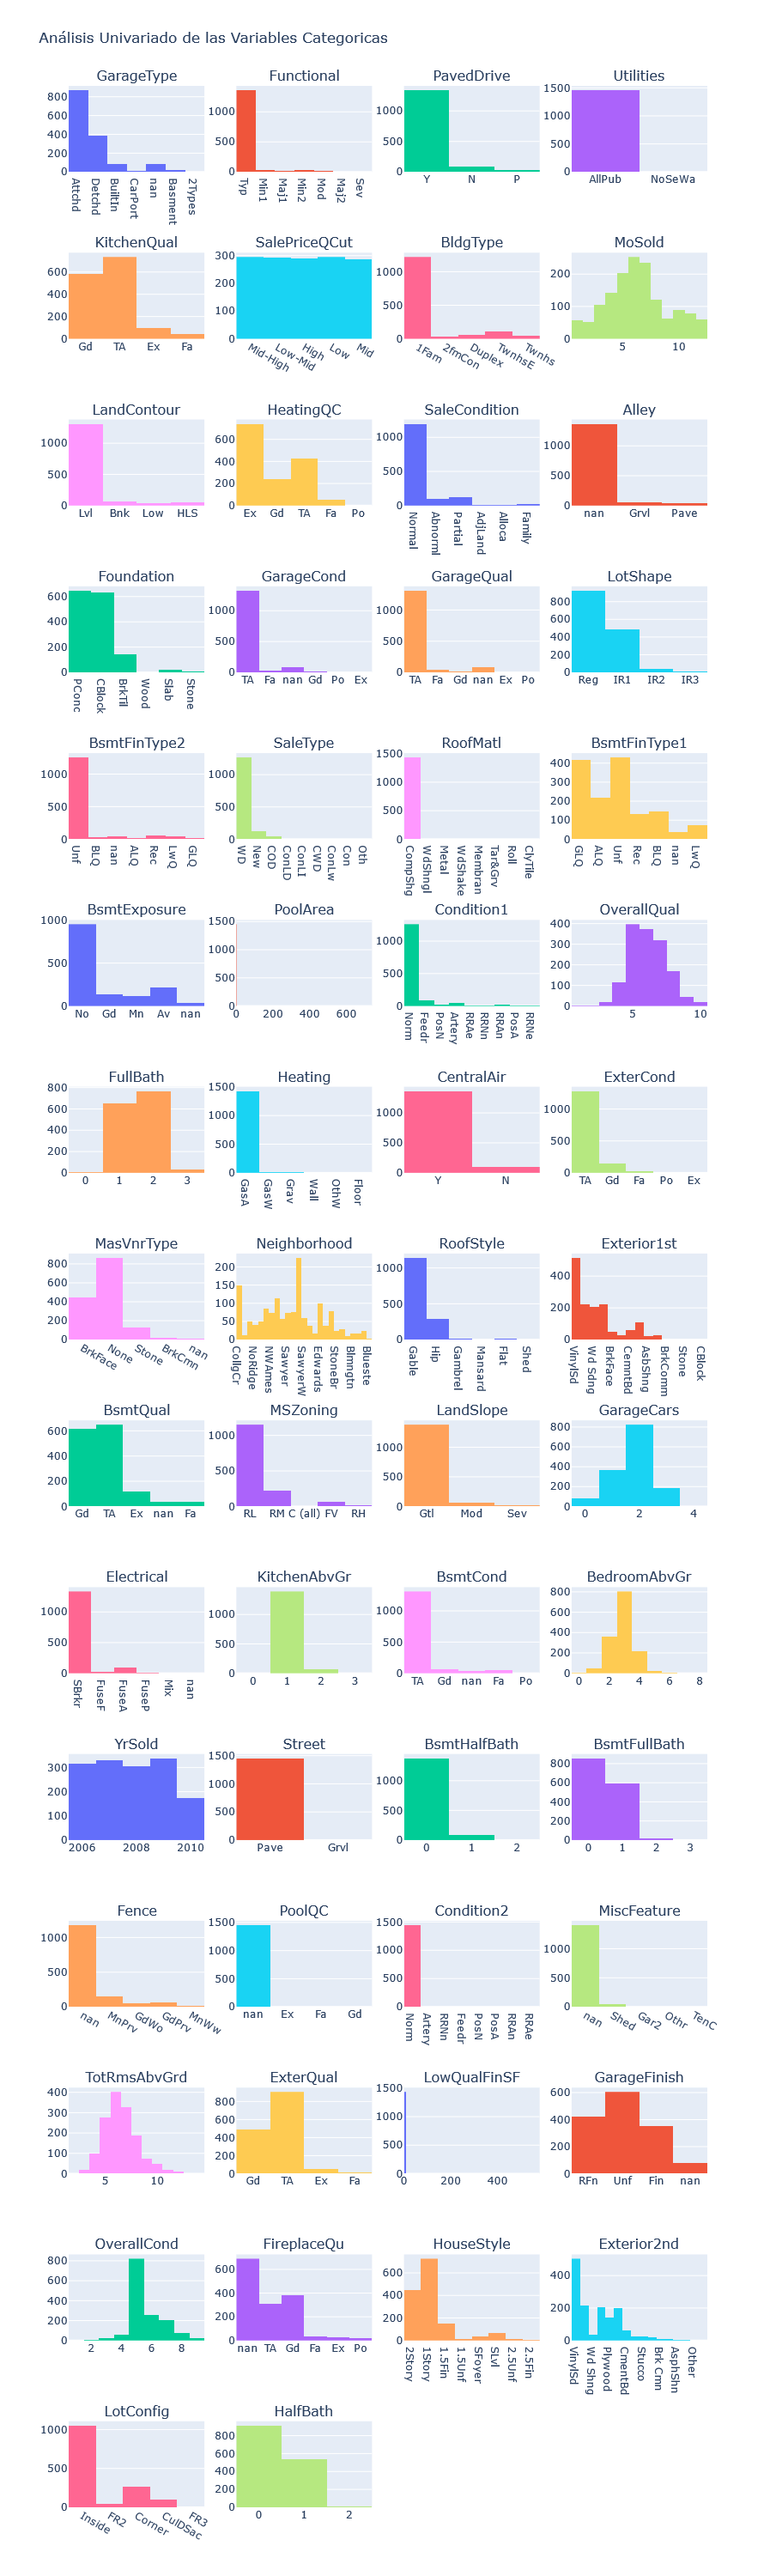

In [16]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

n_cols = 4

fig = make_subplots(
    rows=len(categorical) // n_cols + 1, cols=n_cols, subplot_titles=categorical
)

for idx, col in enumerate(categorical):
    row_idx = idx // n_cols + 1
    col_idx = idx % n_cols + 1

    data = df.loc[:, col]
    hist = go.Histogram(x=data, name=col)
    fig.add_trace(hist, row=row_idx, col=col_idx)

fig.update_layout(
    height=3000,
    title_text="Análisis Univariado de las Variables Categoricas",
    showlegend=False,
)
fig.show()

Al observar las distribuciones, es importante buscar si existe variabilidad dentro de estas, pues por lo general, una variable con un único valor casi seguro, no aporta información a la dinámica de los datos.

### Gráficos de violín

Un gráfico de violín permite sumarizar y observar características de un dataset. Este se comporta como un gráfico de cajas (boxplot), mostrando la mediana, el rango intercuantílico IQR (percentil 75 - percentil 25, o Q3 - Q1) y el rango 1.5 intercuantílico (Q3 +- 1.5 IQR). Además de lo anterior, se suma una estimación de la densidad por kernel a cada lado. Esto quiere decir, que zonas con mayor densidad, se verán como 'montes' horizontales. 

#### OverallQual

Se observa la variable 'OverallQual' (categórica) y se compara con la variable de interés 'SalePrice'. Para ello se usa un gráfico de categórias tipo violín

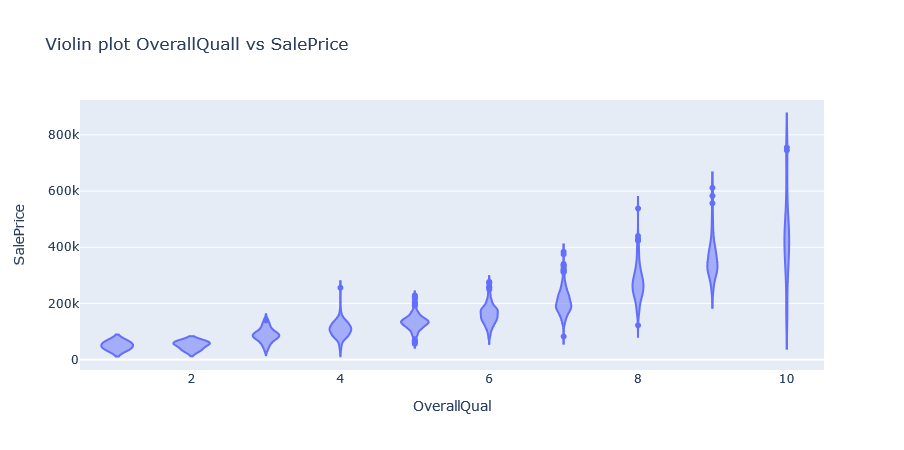

In [17]:
import plotly.express as px

fig = px.violin(
    df, x="OverallQual", y="SalePrice", title="Violin plot OverallQuall vs SalePrice"
)
fig.show()


En el caso de `OverallQuall`, se ve una clara relación entre los distintos niveles de está variable en contraste con difierentes distribuciones de 'SalePrice'. Junto con una distribción que presenta variabilidad, se podría considerar como una de interés. 

### Alternativa: Box Plot

Representa los datos a través de los cuartiles. Dentro de la caja: segundo y tercer cuartil.

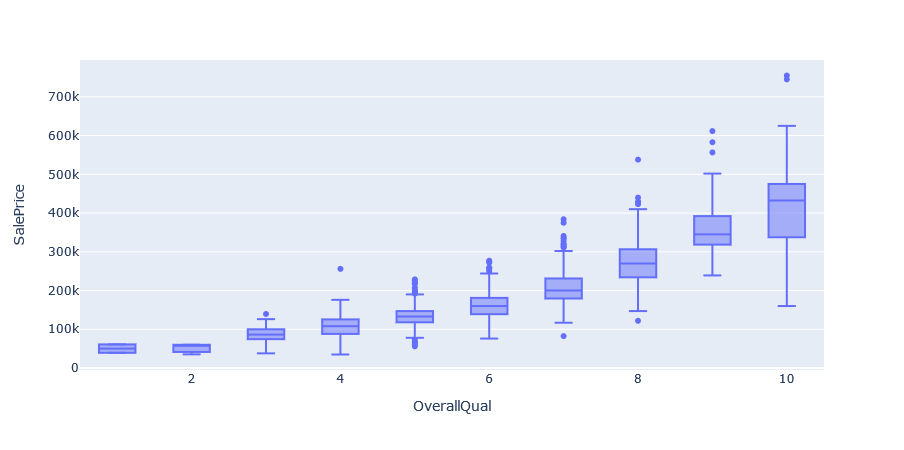

In [18]:
fig = px.box(df, x="OverallQual", y="SalePrice")
fig.show()



#### LandSlope

Por otra parte, analizando las gráficas univariadas, se puede observar que para 'LandSlope', se tiene poca variablidad y no genera diferencias en distribución para 'SalePrice' en ninguna de sus categorias. 

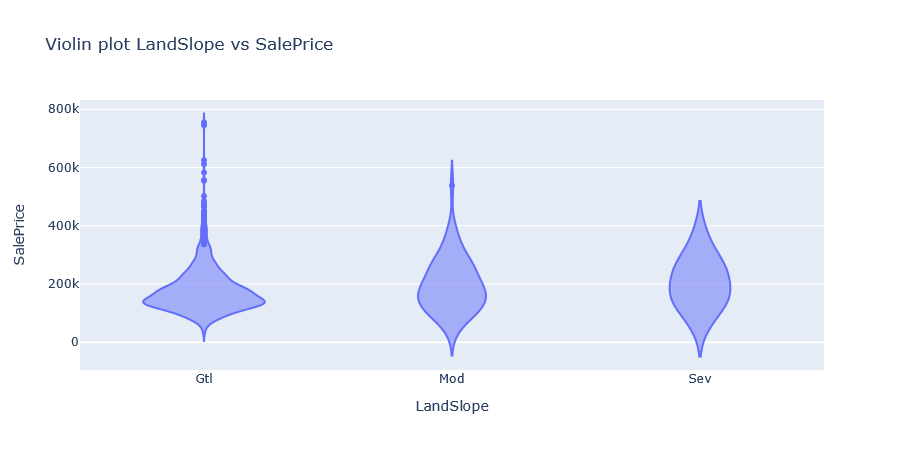

In [19]:
fig = px.violin(
    df, x="LandSlope", y="SalePrice", title="Violin plot LandSlope vs SalePrice"
)
fig.show()

> **Ejercicio ✏️**

1. Los gráficos generados anteriormente siguen exactamente el mismo patrón de generación, lo único que cambia es la columna a analizar. Esto es una mala práctica pues siempre se debe buscar reutilizar código o 'no repetirse' esto se conoce como principio DRY (don't repeat yourself). Construya una función que permita visualizar columnas categóricas del dataset y compararlas con 'SalePrice'. 

2. En función de las visualizaciones construidas, discuta que variables categóricas pueden ser de interés para predecir 'SalePrice'. Busque variabilidad y separación en la distribución de precios. ¿Qué ocurre si una variable categórica posee poca variablidad pero genera buenas separaciones en  'SalePrice'?

### Gráficos de Dispersión o Scatterplots

Para comparar las variables numéricas, se pueden utilizar gráficos de dispersión contra 'SalePrice'. En este caso, se buscan variabilidad en el histograma univariado y a la vez, se buscan relaciones funcionales (del tipo lineal, exponencial, cuadrático, etc..) con 'SalePrice'. 


Por ejemplo, estudiemos la variable 'GrLivArea'. Para esto, primero definimos una función para gráficar variables numéricas con respecto a 'SalePrice'.

In [20]:
def scatter_dists(numeric_col, trend=None):
    """Dibuja un scatterplot de una columna con respecto a SalePrice.
    
    numeric_col:str
    Nombre de la columna
    
    trendline: str
    (Original de plotly) One of `'ols'` or `'lowess'`. If `'ols'`, an Ordinary Least Squares
    regression line will be drawn for each discrete-color/symbol group. If
    `'lowess`', a Locally Weighted Scatterplot Smoothing line will be drawn
    for each discrete-color/symbol group.
    """
    fig = px.scatter(
        df,
        x=numeric_col,
        y="SalePrice",
        title=f"{numeric_col} vs SalePrice",
        trendline=trend,
    )
    fig.show()

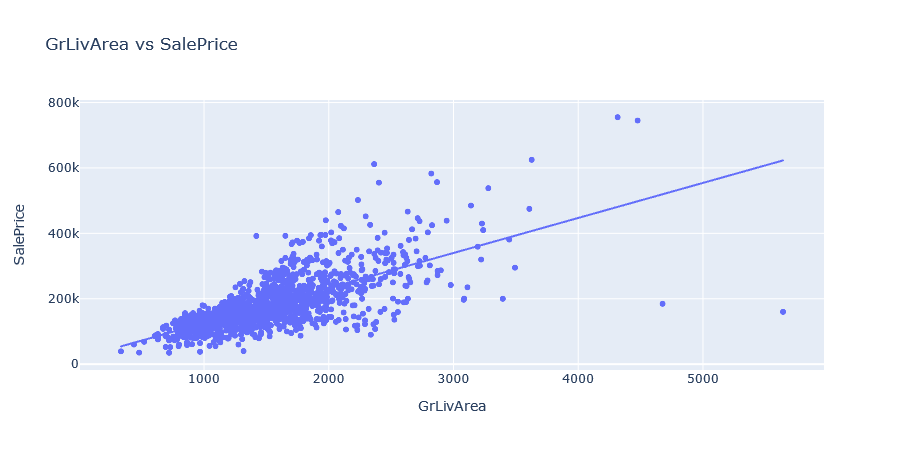

In [21]:
scatter_dists("GrLivArea", trend="ols")

En este caso, se puede observar una distrbución univariada bien definida y un comportamiento lineal aunque ruidoso. Esto hace que 'GrLivArea' sea una variable de interés. De la misma manera, '1stFlrSF', parece reflejar las mismas buenas características. 



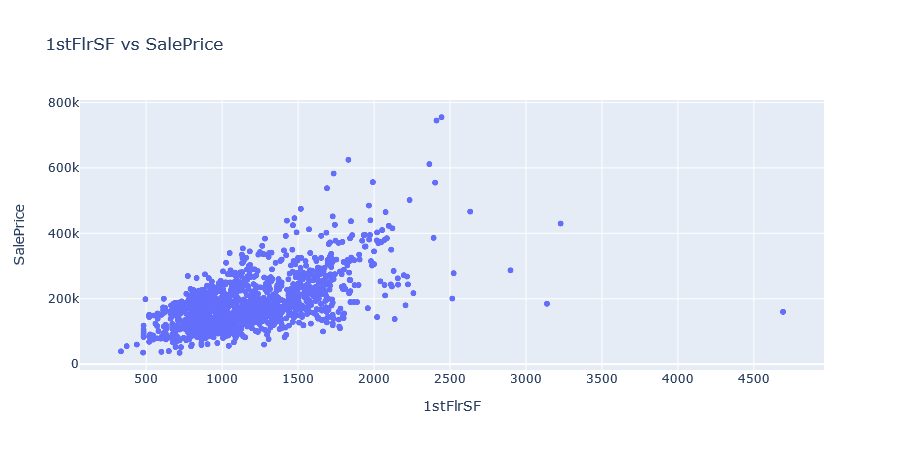

In [22]:
scatter_dists("1stFlrSF")

En el caso de 'TotalBsmtSF' se tiene

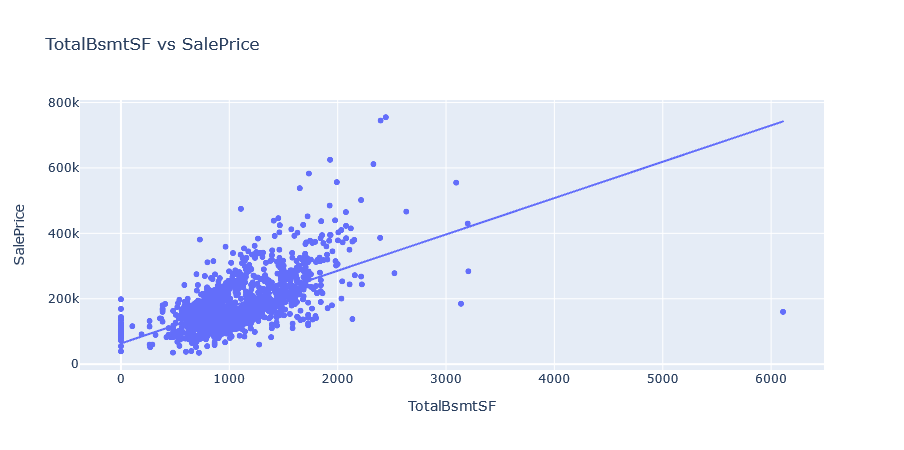

In [23]:
scatter_dists("TotalBsmtSF", trend="ols")

Una relación menos lineal con un poco más de ruido pero una buena distribución en e dataset. Esta variable puede ser de interés pero esto se puede estudiar a posteriori. 

Finalmente para 'MasVnrArea', se tiene

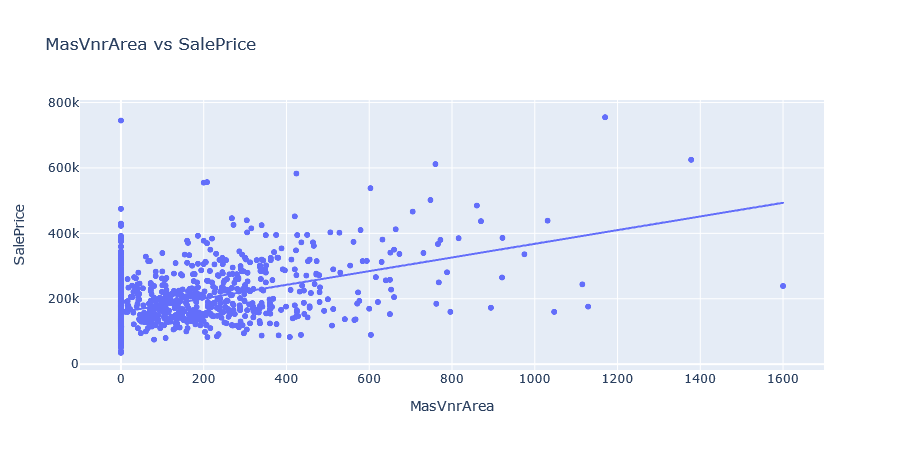

In [24]:
scatter_dists("MasVnrArea", trend="ols")

Se aprecia una distribución altamente concentrada y poco relacionada con la variable a predecir, a priori, se puede considerar como una variable de poco interés en el análisis. 

> **Ejercicio ✏️**:

1. Estudie las siguientes proposiciones: 

    1.'OverallQual' y 'YearBuilt' parecen relacionadas con 'SalePrice'. 
    2. En el caso de 'OverallQual', esta relación es bastante débil.
    3. En el caso de 'YearBuilt', esta relación es bastante débil.
    4. Los gráficos de caja para 'OverallQual contra  'SalePrice' muestran cierta linealidad con respecto a 'SalePrice'.

2. Estudie la distribución univariada de 'SalePrice', a continuación ejecute el test K^2 de D’Agostino usando `normaltest` del módulo `stats` de SciPy. Compare para una significancia de 5%. ¿ Se puede tratar esta variable como distribuida de manera normal, tomando en cuenta su comportamiento estadístico?

3. Las distribuciones de 'TotalBsmtSF' y '1stFlrSF' parecen bastante similares, más aún sus relaciones con 'SalePrice' comparten una tendencia. Ejecute el [test de Kolmogorov-Smirnov ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html) por medio de `ks_2samp` para explorar la hipótesis:

 ```'TotalBsmtSF' y '1stFlrSF' vienen de la misma distribución```
 
4. Estudie algunos estadísticos de interés según el tipo de dato.
    
    1. Para las variables numéricas estudie promedios, desviaciones estándar y rangos intercuartílicos. Utilice los rangos calculados para tener una idea del porcentaje de valores fuera de tales rangos por columna. 
    
    2. Para variables catégoricas calcule frecuencias, proporciones y modas. Utilice lo anterior para obtener alguna idea de la variabilidad de los datos.
    

## Perfilamiento Bivariado

La idea del perfilamiento bivariado es estudiar las relaciones entre variables de interés. Para esto se pueden emplear visualizaciones a pares. 


Se selecciona un conjunto de variables a examinar

In [25]:
df[["SalePrice", "SalePriceQCut"]]

SalePrice SalePriceQCut
Id                           
1        208500      Mid-High
2        181500      Mid-High
3        223500      Mid-High
4        140000       Low-Mid
5        250000          High
...         ...           ...
1456     175000           Mid
1457     210000      Mid-High
1458     266500          High
1459     142125       Low-Mid
1460     147500           Mid

[1460 rows x 2 columns]

In [26]:
interest = [
    "OverallQual",
    "GrLivArea",
    "GarageCars",
    "TotalBsmtSF",
    "FullBath",
    "YearBuilt",
    "SalePrice",
]

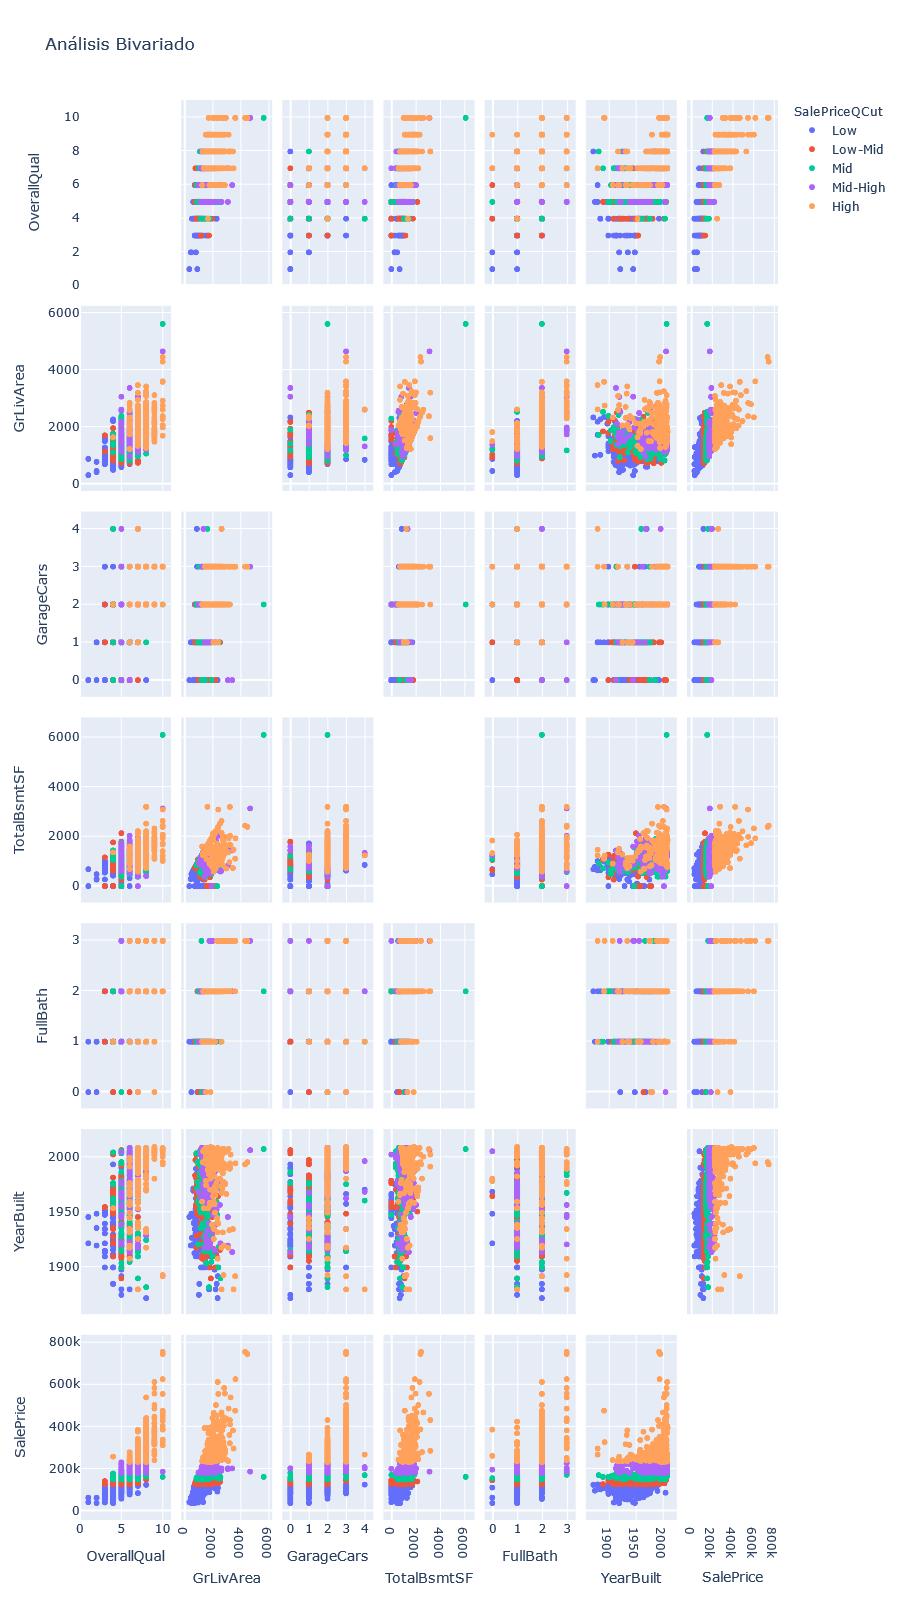

In [27]:
fig = px.scatter_matrix(
    df.sort_values(by="SalePriceQCut", ascending=True),
    dimensions=interest,
    height=1600,
    title="Análisis Bivariado",
    color="SalePriceQCut",
)
fig.update_traces(diagonal_visible=False)
fig.show()

La última fila de esta visualización entrega una idea de la relación entre 'SalePrice' y las demás variables de interés. Dentro de estas relaciones, se observan ciertos comportamientos lineales y en particular para 'OveralQuall' y 'YearBuilt' se observa cierta exponencialidad. Dentro de las interacciones entre variables, se observa que 'GrLivArea' y 'TotalBsmtSf' se comportan de manera similar contra 'OverllQuall', esperandose cierta tendencia creciente en ambos casos.

## Análisis Temporal

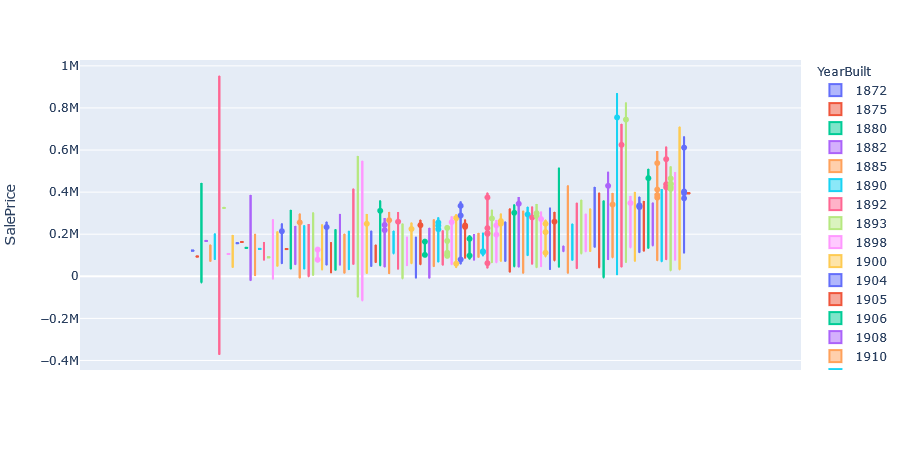

In [28]:
px.violin(df.sort_values('YearBuilt'), y='SalePrice', color='YearBuilt' )

### Categorías Paralelas

Permite comparar el comportamiento de variables categoricas a través de un gráfico 2d. Cada categoría es representada por una barra y conjuntos de datos similares se agrupan en cintas (*ribbons*).

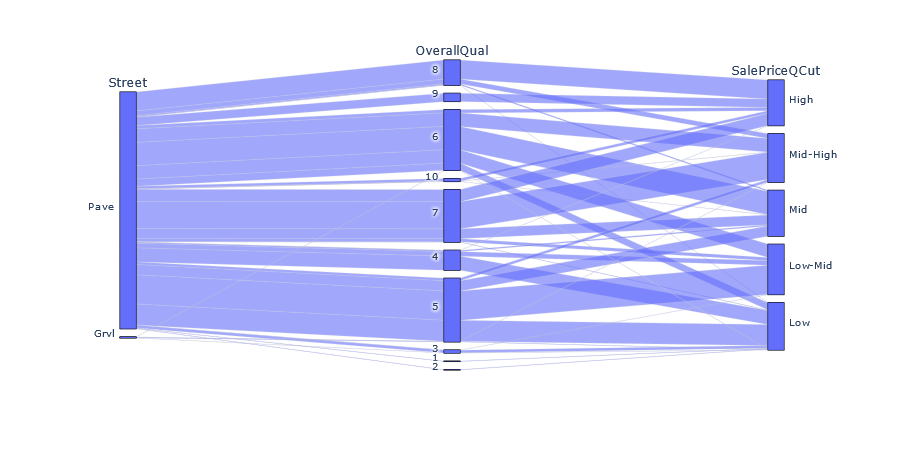

In [29]:
fig = px.parallel_categories(
    df.sample(1000).sort_values("SalePriceQCut", ascending=False),
    dimensions=[
        "Street",
        "OverallQual",
        "SalePriceQCut",
    ],
)
fig.show()

> **Ejercicio ✏️**: Explore el equivalente de Categorías Paralelas para variables numéricas ([Coordenadas paralelas](https://plotly.com/python/parallel-coordinates-plot/)) y grafique la relación entre variables numéricas y 'SalePrice'.

### Correlaciones Entre Variables

Los análsis iniciales basados en visualizaciones sirven para comprender a grandes rasgos la estructura del dataset. Este tipo de exploración debe ser acompañada de tests estadísticos como los vistos en los ejercicios anteriores. En el caso del perfilamiento bivariado se puede usar una técnica mixta, basada en el análisis de las correlaciones.

>  La correlación indica la fuerza y la dirección de una relación lineal entre dos variables estadísticas. Ojo:  La correlación entre dos variables no implica, por sí misma, ninguna relación de causalidad.

Podemos calcular la matriz de correlaciones por variables numericas usando el método `corr()`.

In [30]:
corrmat = df.corr()

In [31]:
corrmat

MSSubClass  LotFrontage   LotArea  YearBuilt  YearRemodAdd  \
MSSubClass       1.000000    -0.386347 -0.139781   0.027850      0.040581   
LotFrontage     -0.386347     1.000000  0.426095   0.123349      0.088866   
LotArea         -0.139781     0.426095  1.000000   0.014228      0.013788   
YearBuilt        0.027850     0.123349  0.014228   1.000000      0.592855   
YearRemodAdd     0.040581     0.088866  0.013788   0.592855      1.000000   
MasVnrArea       0.022936     0.193458  0.104160   0.315707      0.179618   
BsmtFinSF1      -0.069836     0.233633  0.214103   0.249503      0.128451   
BsmtFinSF2      -0.065649     0.049900  0.111170  -0.049107     -0.067759   
BsmtUnfSF       -0.140759     0.132644 -0.002618   0.149040      0.181133   
TotalBsmtSF     -0.238518     0.392075  0.260833   0.391452      0.291066   
1stFlrSF        -0.251758     0.457181  0.299475   0.281986      0.240379   
2ndFlrSF         0.307886     0.080177  0.050986   0.010308      0.140024   
GrLivArea        0.074853     0.402797  0.263116   0.199010      0.287389   
Fireplaces      -0.045569     0.266639  0.271364   0.147716      0.112581   
GarageYrBlt      0.085072     0.070250 -0.024947   0.825667      0.642277   
GarageArea      -0.098672     0.344997  0.180403   0.478954      0.371600   
WoodDeckSF      -0.012579     0.088521  0.171698   0.224880      0.205726   
OpenPorchSF     -0.006100     0.151972  0.084774   0.188686      0.226298   
EnclosedPorch   -0.012037     0.010700 -0.018340  -0.387268     -0.193919   
3SsnPorch       -0.043825     0.070029  0.020423   0.031355      0.045286   
ScreenPorch     -0.026030     0.041383  0.043160  -0.050364     -0.038740   
MiscVal         -0.007683     0.003368  0.038068  -0.034383     -0.010286   
SalePrice       -0.084284     0.351799  0.263843   0.522897      0.507101   

               MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
MSSubClass       0.022936   -0.069836   -0.065649  -0.140759    -0.238518   
LotFrontage      0.193458    0.233633    0.049900   0.132644     0.392075   
LotArea          0.104160    0.214103    0.111170  -0.002618     0.260833   
YearBuilt        0.315707    0.249503   -0.049107   0.149040     0.391452   
YearRemodAdd     0.179618    0.128451   -0.067759   0.181133     0.291066   
MasVnrArea       1.000000    0.264736   -0.072319   0.114442     0.363936   
BsmtFinSF1       0.264736    1.000000   -0.050117  -0.495251     0.522396   
BsmtFinSF2      -0.072319   -0.050117    1.000000  -0.209294     0.104810   
BsmtUnfSF        0.114442   -0.495251   -0.209294   1.000000     0.415360   
TotalBsmtSF      0.363936    0.522396    0.104810   0.415360     1.000000   
1stFlrSF         0.344501    0.445863    0.097117   0.317987     0.819530   
2ndFlrSF         0.174561   -0.137079   -0.099260   0.004469    -0.174512   
GrLivArea        0.390857    0.208171   -0.009640   0.240257     0.454868   
Fireplaces       0.249070    0.260011    0.046921   0.051575     0.339519   
GarageYrBlt      0.252691    0.153484   -0.088011   0.190708     0.322445   
GarageArea       0.373066    0.296970   -0.018227   0.183303     0.486665   
WoodDeckSF       0.159718    0.204306    0.067898  -0.005316     0.232019   
OpenPorchSF      0.125703    0.111761    0.003093   0.129005     0.247264   
EnclosedPorch   -0.110204   -0.102303    0.036543  -0.002538    -0.095478   
3SsnPorch        0.018796    0.026451   -0.029993   0.020764     0.037384   
ScreenPorch      0.061466    0.062021    0.088871  -0.012579     0.084489   
MiscVal         -0.029815    0.003571    0.004940  -0.023837    -0.018479   
SalePrice        0.477493    0.386420   -0.011378   0.214479     0.613581   

               ...  Fireplaces  GarageYrBlt  GarageArea  WoodDeckSF  \
MSSubClass     ...   -0.045569     0.085072   -0.098672   -0.012579   
LotFrontage    ...    0.266639     0.070250    0.344997    0.088521   
LotArea        ...    0.271364    -0.024947    0.180403    0.171698   
YearBuilt      ...    0.147716   

se muestran las dos variables más correlacionadas (positivamente) con 'SalePrice'.

Y lo podemos graficas usando `px.imshow`

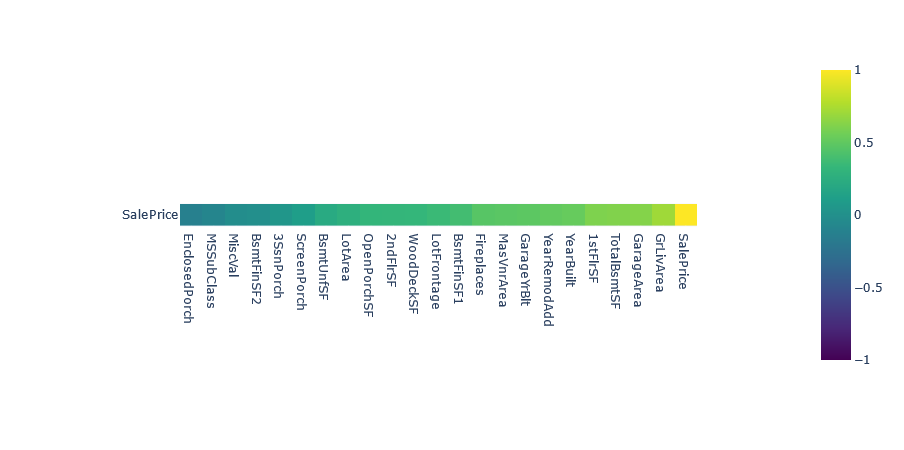

In [32]:
# Univariado: Cada variable con respecto al precio

px.imshow(
    corrmat.loc[["SalePrice"], :].sort_values("SalePrice", axis=1),
    zmin=-1,
    zmax=1,
    color_continuous_scale=px.colors.sequential.Viridis,
)

Si bien, las correlaciones con 'SalePrice' deben ser analizadas con más detenimiento, se pude ver claramente que 'GrLivArea', 'TotalBsmtSF', y 'OverallQual' juegan un papel preponderante en el valor de la propiedad.

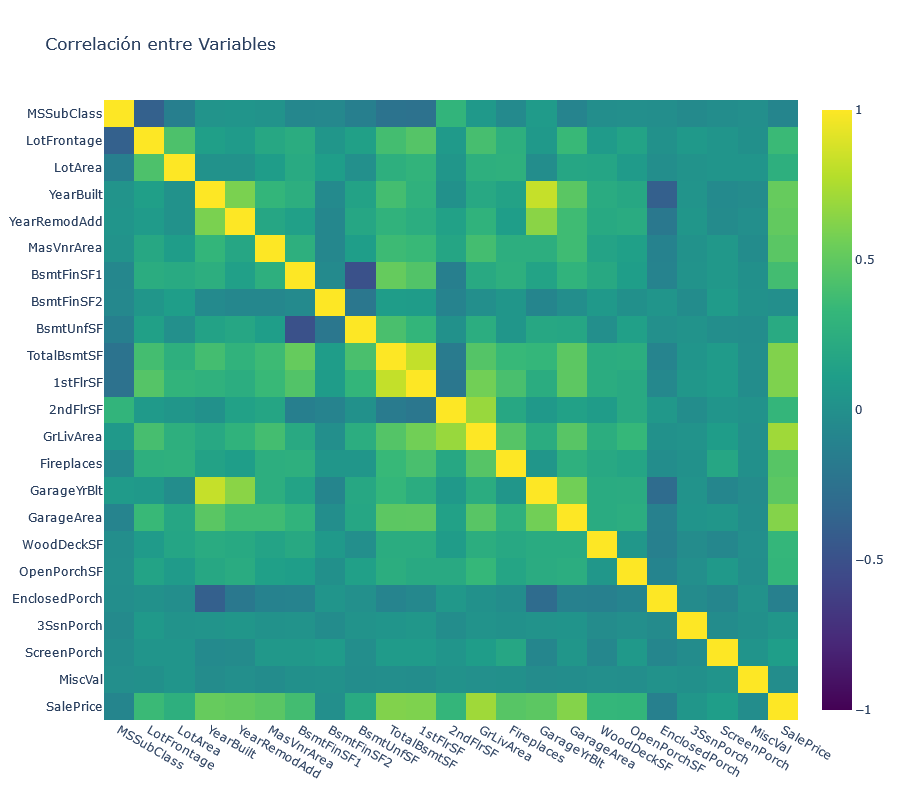

In [33]:
px.imshow(
    corrmat,
    aspect="16:9",
    title="Correlación entre Variables",
    height=800,
    zmin=-1,
    zmax=1,
    color_continuous_scale=px.colors.sequential.Viridis,
)

Según el esquema de valores, se buscan los puntos más claros y más oscuros fuera de la diagonal. En primera instancia, las variables  'TotalBsmtSF' y '1stFlrSF' parece bastante correlacionadas, lo mismo ocurre con la variables 'GarageCars' y 'GarageArea', esto puede indicar multicolinearidad que implica información duplicada o relacionada de manera trivial en el dataset. 

> **Ejercicio ✏️**: Obtenga las 15 correlaciones más altas (positiva o negativa) con 'SalePrice'.


### Tablas de Contingencia

Para analizar valores categóricos (categórico vs categórico) existen herramientas especializadas una de ellas es por medio de tablas de dos tratamientos o de contingencia (2 way tables). 

Estas permiten calcular el numero de ocurrencias de una variable para cada una de sus categorías en comparación con los valores de otra variable.

Por ejemplo, construyamos una tabla para analizar 'OverallQual' vs 'GarageCars':

In [34]:
# Se construye la tabla
tabla = pd.crosstab(
    index=df["OverallQual"],
    columns=df["GarageCars"],
    margins=True,
    margins_name="Total",
)
tabla

GarageCars    0    1    2    3  4  Total
OverallQual                             
1             2    0    0    0  0      2
2             1    2    0    0  0      3
3             6    6    6    2  0     20
4            26   50   37    1  2    116
5            32  195  163    6  1    397
6            12   95  264    3  0    374
7             1   20  258   38  2    319
8             1    1   86   80  0    168
9             0    0    8   35  0     43
10            0    0    2   16  0     18
Total        81  369  824  181  5   1460

> **Nota**: Esta operación es muy similar a `pd.pivot_table`

Para el caso de  'OverallQual' y 'GarageCars' vemos que tienden a acumularse dentro de una rango reducido, se puede concluir que a medida que 'OverallQual' crece entre 4 y 6, aparece un aumento considerable en la categoría 'GarageCars' hasta que esta última llega al valor 2, valores superiores paracieran ser independientes de 'OverallQual'. 

> **Ejercicios ✏️**

1. Compare variables categóricas usando este método, ¿se puede encontrar alguna relación entre categórias?

2. Es posible aplicar este método para comparar variables categóricas y continuas, para esto se necesita categorizar la variable continua objetivo. Categoríce la variable 'SalePrice' en 5 tramos y compare con 'OverallQual' ¿Se observa alguna tendencia?


Otra forma de comparar variables categóricas es por medio de un test $\chi^2$. Este permite obtener un indicador de significancia estadística entre variables. Se basa en una tabla de contingencia y proporciona la probabilidad de que dos variables categóricas sean independientes basádandose en el estádistico $\chi^2$, entrega también un arreglo con frecuencias esperadas.

In [35]:
from scipy.stats import chi2_contingency

# Se debe trabajar la tabla sin margenes
tabla = pd.crosstab(index=df["OverallQual"], columns=df["GarageCars"], margins=False)

chi2, p, dof, ex = chi2_contingency(tabla)

La tabla de frecuencias esperadas se puede interpretar de la siguiente forma:

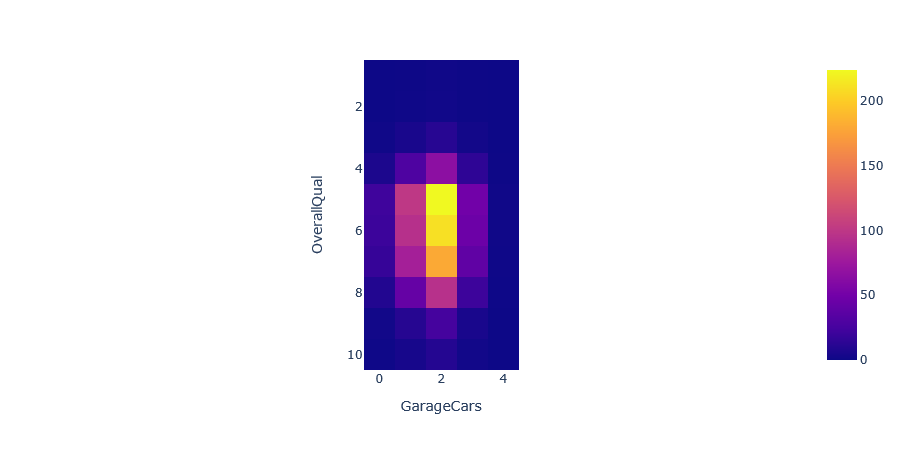

In [36]:
expected_freq = pd.DataFrame(ex, index=range(1, 11))
expected_freq.index.name = "OverallQual"
expected_freq.columns.name = "GarageCars"
px.imshow(expected_freq)

Aquí, la frecuencia esperada para la la categoría 1 'OverallQual' de estar en la categoría 0 de 'GarageCars' es 0.11. Se puede decir que esta configuración es muy poco probable en comparación a otras como pertenecer a la categoría 6 de 'OverallQual' y 2 de 'GarageCars'. Este tipo de tablas permite clasificar las relaciones entre variables categóricas y obtener *insights* sobre las dinámicas que el dataset refleja. 

El valor $p$ entregado por el cáculo corresponde a:

In [37]:
p

3.541426937422792e-182

Si para este test llamamos $\alpha$ al valor de significancia, se puede resumir:

1. Si $p > \alpha$ no hay evidencia para rechazar la hipótesis nula por lo que se pueden considerar independientes.

2. Si $p \leq \alpha$ hay evidencia para rechazar la hipótesis nula por lo que se puede decir que existe una dependencia estadística entre las variables. 


Para una significancia del 5% , hay evidencia para rechazar la hipótesis de independencia entre 'OverallQual' y 'GarageCars', luego puede existir un factor latente que las relaciona (¿será 'SalePrice'?)

In [38]:
p <= 0.05

True

Como consideración general, para que este test sea consistente estadísticamente, se deben observar frecuencias (esperadas y observadas) mayores a 5. 

**Ejercicio**

1. Utilice el gráfico de correlaciones para escojer dos variables categóricas de interés. Verifique si existen relaciones estadísticas entre ellas. 

Finalmente, para comparar variables numéricas y categóricas, es posible utilizar técnicas especializadas como lo son los tests Z y T. Estos tests se utilizan de manera simultanea con gráficos de caja (o violín), donde cada caja representa una categoría. 

Tanto el test Z como el T permiten verificar si las medias de dos grupos son estadísticamente diferentes entre si. aquí, el estadístico Z se define por

\begin{equation}z=\frac{\left|\bar{x}_{1}-\bar{x}_{2}\right|}{\sqrt{\frac{s_{1}^{2}}{n_{1}}+\frac{s_{2}^{2}}{n_{2}}}}\end{equation}

Si su probabilidad asociada es pequeña, entonces **la diferencia de las medias** es significativa. 

Por otra parte, el estadístico T es más robusto a tamaños de observaciones pequeños (menores que 30 por ejemplo), este viene dado por 

\begin{equation}
t=\frac{\bar{X}_{1}-\bar{X}_{2}}{\sqrt{S^{2}\left(\frac{1}{N_{1}}+\frac{1}{N_{2}}\right)}}
\end{equation}

Donde 

\begin{equation}
S^{2}=\frac{\left(N_{1}-1\right) S_{1}^{2}+\left(N_{2}-1\right) S_{2}^{2}}{N_{1}+N_{2}-2}
\end{equation}

Aquí , $\bar{X}_{1}, \bar{X}_{2}$ son las medias, $S_{1}^{2}, S_{2}^{2}$ varianzas y $N_1$ , $N_2$ los totales de cada grupo a testear. 

**Ejercicios**

1. Utilice el test de independencia $t$ (o 2 - sample $t$-test) para comparar 2 variables continuas de interés. [*Hint*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

2. Observe que el caso categórico vs continuo, cada categoría representa un grupo de valores continuos asociados. Por ejemplo, si la variable categórica `A` tiene las categorías `c_1` y `c_2`, al compararla con la variable continua `B`, es necesario agrupar los valores de `B` para `c_1` y para `c_2` para luego estudiar su independencia. Utilice el test anterior para medir independencias de grupos entre una variable categórica vs 'SalePrice'. **Obs**: La variable categórica debe ser bivariada.

3. Utilice el test Z con las variables anteriores y compare. ¿Qué restricciones extra posee este test?

Finalmente, se puede hacer uso de un test F o ANOVA. Este test permite comparar más de una media al mismo tiempo, una manera simple de aplicar este test consiste en método conocido como **one way ANOVA**, aquí, se testea si más de 2 grupos son similares basados en sus medias. En este caso, la hipótesis nula es 

`No hay diferencia significativa entre los grupos`

**Ejemplo**

Se selecciona la variable 'GarageCars' y se compara con 'SalePrice'. 

In [39]:
grouped = df[["SalePrice", "GarageCars"]].groupby("GarageCars")

En la variable 'GarageCars' se distinguen 5 categorías

In [40]:
len(df["GarageCars"].unique())

5

a partir de la agrupación anterior, se forman entonces 5 grupos de valores para 'SalePrice'.

In [41]:
len(grouped.groups)

5

Se obtienen los grupos

In [42]:
total_groups = len(grouped.groups)
groups = [grouped.get_group(i) for i in range(total_groups)]

Se muestra el grupo correspondiente a la categoría 0

In [43]:
groups[0].head()

SalePrice GarageCars
Id                      
40      82000          0
49     113000          0
79     136500          0
89      85000          0
90     123600          0

Se limpia el formato de cada grupo

In [44]:
def group_cleaner(group):
    """ Limpia un grupo.
    Reconoce la categoria del grupo, en la posicion [:,1], 
    guarda ese nombre y elimina la columna de categoria, 
    posteriormente renombra la columna.
    
    Args:
    ----------
    
    group: pandas Groupby object
          Recibe una agrupacion para categorias
          
    Returns:
    ----------
        pandas Grppuby object
        Entrega el grupo ordenado.
    """
    group_0 = group.copy()
    name = group_0.iloc[0, 1]
    group_0.drop("GarageCars", axis=1, inplace=True)
    print(name)
    group_0.columns = ["cat_{}".format(name)]

    return group_0

se procede a limpiar

In [45]:
groups_to_test = list(map(group_cleaner, groups))

0
1
2
3
4


Se muestra el grupo correspondiente a la categoria 0 post limpieza

In [46]:
groups_to_test[0]

cat_0
Id          
40     82000
49    113000
79    136500
89     85000
90    123600
...      ...
1350  122000
1408  112000
1450   92000
1451  136000
1454   84500

[81 rows x 1 columns]

Se procede a testear

In [47]:
from scipy.stats import f_oneway

F, p = f_oneway(*groups_to_test)

print("Estadistico F:", F)
print("p valor :", p)

Estadistico F: [351.20748621]
p valor : [1.12112877e-211]


probando para una significancia del 5% se tiene hay evidencia para rechazar la hipótesis nula y por tanto hay una diferencia significativa entre los grupos. 

In [48]:
alpha = 0.05
p <= alpha

array([ True])

**Ejercicio ✏️**: Compruebe el resultado del test ANOVA anterior con un analísis visual por medio de gráficos de violín.

# El problema de los datos faltantes 

Los métodos estándar de manejo de datos han sido desarrollados para para analizar arreglos tabulares. Por lo general las filas de tal arreglo representan observaciones y las columnas sus características asociadas. Cada entrada en este arreglo puede ser modelada como un número, siendo este ligado a un proceso subyacente continuo o discreto. Para comprender tal proceso, es de utilidad sumarizar y observar los valores faltantes con el fin de obtener patrones y seleccionar estrategias para tratarlos. 

## Exploración de valores faltantes

Cuando los datos faltantes se encuentran en variables que no son de interés, se pueden obviar. Sin embargo, esto no es la regla general.

**Ejemplo**

Observe que en los perfilamientos anteriores, las variables categóricas:

```python
var_missing = ['GarageQual', 'GarageCond', 'BsmtFinType1','BsmtCond', 'GarageFinish', 'Fence', 'BsmtExposure',  'BsmtQual', 'MiscFeature', 'GarageType', 'Electrical', 'FireplaceQu', 'BsmtFinType2','MasVnrType']
```
Parecen no tener valores faltantes.

In [49]:
var_missing = [
    "GarageQual",
    "GarageCond",
    "BsmtFinType1",
    "BsmtCond",
    "GarageFinish",
    "Fence",
    "BsmtExposure",
    "BsmtQual",
    "MiscFeature",
    "GarageType",
    "Electrical",
    "FireplaceQu",
    "BsmtFinType2",
    "MasVnrType",
]


df[var_missing].isnull().sum()

GarageQual      0
GarageCond      0
BsmtFinType1    0
BsmtCond        0
GarageFinish    0
Fence           0
BsmtExposure    0
BsmtQual        0
MiscFeature     0
GarageType      0
Electrical      0
FireplaceQu     0
BsmtFinType2    0
MasVnrType      0
dtype: int64

Sin embargo, basta observar las columnas para comprender que tales variables si poseen valores faltantes

In [50]:
df[var_missing].head()

GarageQual GarageCond BsmtFinType1 BsmtCond GarageFinish Fence  \
Id                                                                  
1          TA         TA          GLQ       TA          RFn   nan   
2          TA         TA          ALQ       TA          RFn   nan   
3          TA         TA          GLQ       TA          RFn   nan   
4          TA         TA          ALQ       Gd          Unf   nan   
5          TA         TA          GLQ       TA          RFn   nan   

   BsmtExposure BsmtQual MiscFeature GarageType Electrical FireplaceQu  \
Id                                                                       
1            No       Gd         nan     Attchd      SBrkr         nan   
2            Gd       Gd         nan     Attchd      SBrkr          TA   
3            Mn       Gd         nan     Attchd      SBrkr          TA   
4            No       TA         nan     Detchd      SBrkr          Gd   
5            Av       Gd         nan     Attchd      SBrkr          TA   

   BsmtFinType2 MasVnrType  
Id                          
1           Unf    BrkFace  
2           Unf       None  
3           Unf    BrkFace  
4           Unf       None  
5           Unf    BrkFace

Por tal motivo es necesario realizar una exploración inicial de los datos faltantes en conjunción con los análisis de distribución iniciales. 

**Ejercicios ✏️**

1. Estudie la distribución de los valores faltantes en las variables numéricas.

2. Considerando que para las variables categóricas las variables con valor 'nan' son consideradas como una nueva categoría. ¿Se ven afectados los análisis anteriores sobre sus distribuciones?

**Ejemplo**

Para estudiar en mayor profundidad la distribución de los valores faltantes, se procede a transformarlos en formato `np.nan`

In [51]:
df.replace("nan", np.nan, inplace=True)

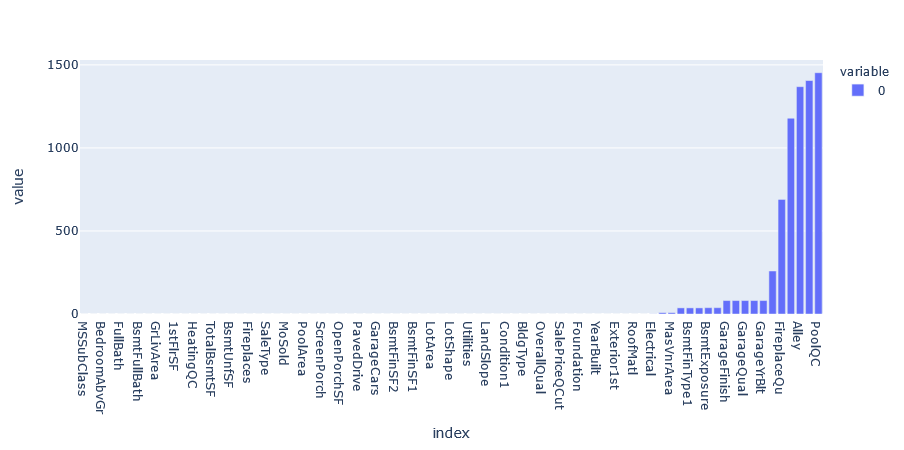

In [52]:
px.bar(df.isnull().sum().sort_values())

## Nullity Matrix 

En términos generales, los valores perdidos de este dataset se encuentran relativamente limpios pues están estandarizados con la categoría 'nan'.


Dado que sumarizar valores faltantes genera una estructura de datos, vale la pena explorarla visualmente, para facilitar tal tarea, existe la librería `missingno`

In [53]:
# Instalamos el paquete usando conda o pip
import sys

!conda install --yes --prefix {sys.prefix} missingno
# !{sys.executable} -m pip install numpy # descomentar si se usa pip
import missingno as msno

Solving environment: ...working... done

# All requested packages already installed.



Las visualizaciones de generadas por medio de esta librería pueden ser utilizadas para discutir el problema de valores faltantes y generan una estrategia para su tratamiento.

In [54]:
df.isnull().sum().nlargest(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
dtype: int64

mediante la libreria `missingno` es posible ver el panorama completo de los valores faltanes en el dataset de manera sencilla 

<AxesSubplot:>

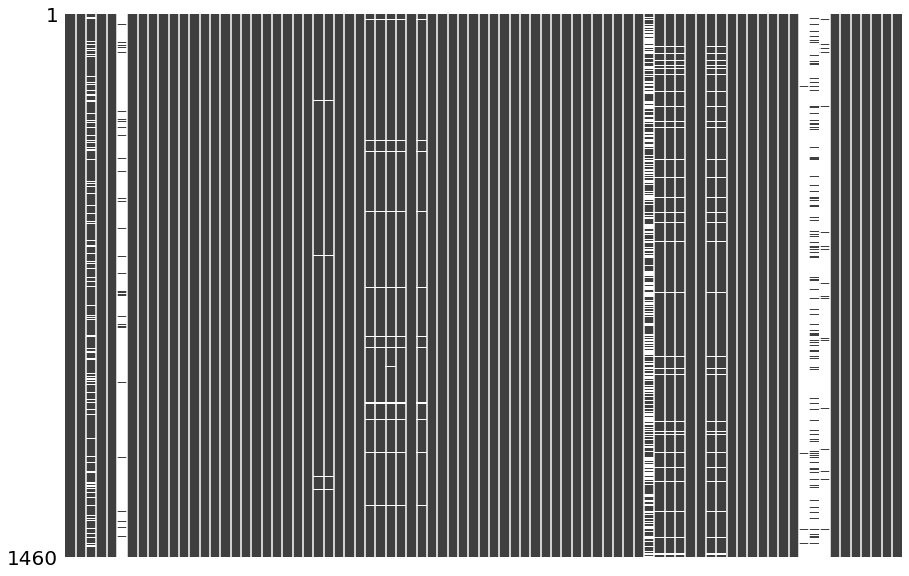

In [55]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[15, 10])

msno.matrix(df, ax=ax, sparkline=False)

**Ejercicio ✏️**

1. Genere un subconjunto con las 10 columnas con mayor información faltante y genere el gráfico anterior sin usar un objeto `axes` y con la opción `sparkline=True`.

Esta visualización muestra que exiten columnas practicamente sin información, según la agregación anterior, estas corresponden a 'PoolQC', 'MiscFeature' y 'Alley'. 

Por medio de correlaciones entre valores faltantes, es posible obtener un análisis bivariado análogo al anteriormente generado. Para ello se puede utilizar un mapa de calor.

<AxesSubplot:>

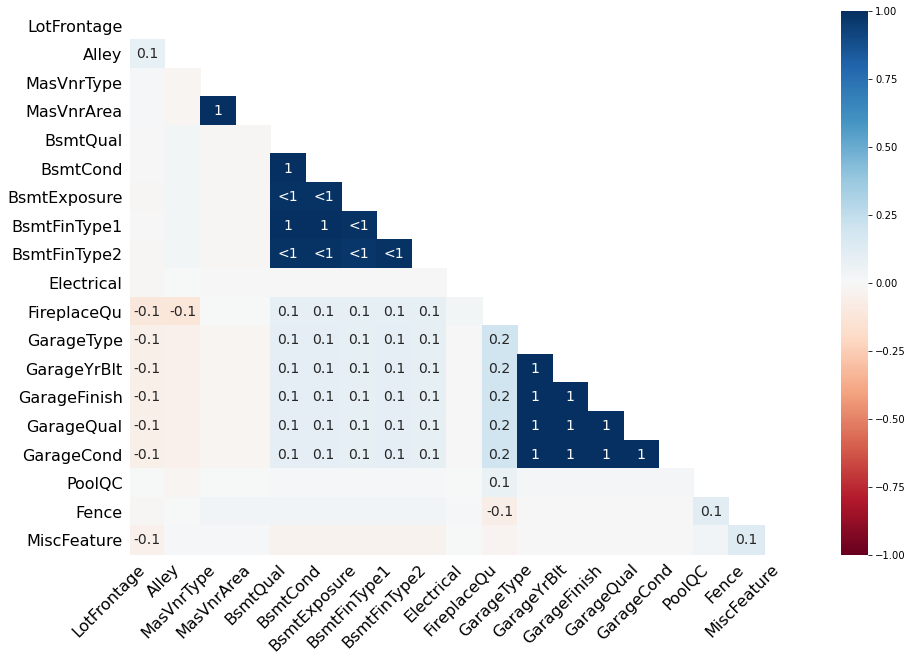

In [56]:
fig, ax = plt.subplots(figsize=[15, 10])
msno.heatmap(df, ax=ax)

Este gráfico muestra correlaciones de nulidad entre pares de variables, estas varian desde -1 a 1, donde

- $-1$ significa que las variables son excluyentes, es decir, la aparición de una hace que la otra este ausente. 
- $1$ corresponde inclusión, esto quiere decir, que la aparición de una hace que la otra aparezca. Valores cercanos a 0 (sin valor numérico en el gráfico) indican ausencia de relación de nulidad entre las variables.

En el gráfico recien generado, no se observen relaciones de nulidad negativa, por otra parte, existen variables fuertemente relacionadas en cuanto a su información como lo son 'MasVnrType' y 'MasVnrArea', el comportamiento general es que la información esta fuertemente relacionada (en el sentido de inclusión de información) o simplemente no lo está. 


> **Ejercicio ✏️**

1. El gráfico de correlaciones de nulidad permite tener una idea de como se relaciona la información faltante en pares de variables. Para comparar más de dos variables es posible utilizar un *dendograma*. Utilice las 20 variables con mayor cantidad de valores faltanes visualice su dendograma por medio de `msno.dendogram`. Interprete los resultados.[*Hint*](https://github.com/ResidentMario/missingno)




> **Pregunta ❓**: ¿Qué hacemos con las columnas con datos faltantes?